In [1]:
# Importando as bibliotecas e retirando os avisos sobre os gráficos que vão ser gerados

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
# Leitura do dataset
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
# Informações das primeiras colunas, poderiamos usar um .tail() para pegar as últimas linhas
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Informações em geral do dataset: os nomes das colunas, quantas linhas estão preenchidas e os tipos de dados em cada coluna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Da info anterior sabemos que temos colunas nulas, vamos descobrir quais e quantas

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Preenchemos os valores das colunas nulas com a info desconhecido

df = df.fillna('desconhecido')

In [7]:
# Uma estatística sobre a única coluna númerica que temos

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
# Vamos nos livrar da coluna com o id do conteúdo

df.drop('show_id', axis=1, inplace=True)

In [9]:
# A ideia é agrupar o dataset em dois valores, obje para as colunas objetivas e num para as colunas numericas, vamos usar isso futuramente

col_obj = []
col_num = []

for col in df.columns:
    if df[col].dtype == 'object':
        col_obj.append(col)
    else :
        col_num.append(col)

In [10]:
# Usamos a lista preenchida para mostrar informações (gráficos e quantidades) das colunas objetivas
# Como temos muitos valores, não vamos gerar os gráficos e sim mostrar uma tabela com os valores 

for col in col_obj:
    # Conta a frequência dos valores na coluna
    qtd = df[col].value_counts().reset_index(name='Frequência')
    qtd.columns = [col, 'Frequência']
    # Imprime as frequências
    print(f'Frequência da coluna {col}:')
    print(qtd)
    print("\n")

Frequência da coluna type:
      type  Frequência
0    Movie        6131
1  TV Show        2676


Frequência da coluna title:
                                      title  Frequência
0                      Dick Johnson Is Dead           1
1                                  Ip Man 2           1
2          Hannibal Buress: Comedy Camisado           1
3                                Turbo FAST           1
4                             Masha's Tales           1
...                                     ...         ...
8802                        Love for Sale 2           1
8803                           ROAD TO ROMA           1
8804                              Good Time           1
8805  Captain Underpants Epic Choice-o-Rama           1
8806                                 Zubaan           1

[8807 rows x 2 columns]


Frequência da coluna director:
                            director  Frequência
0                       desconhecido        2634
1                      Rajiv Chilaka          

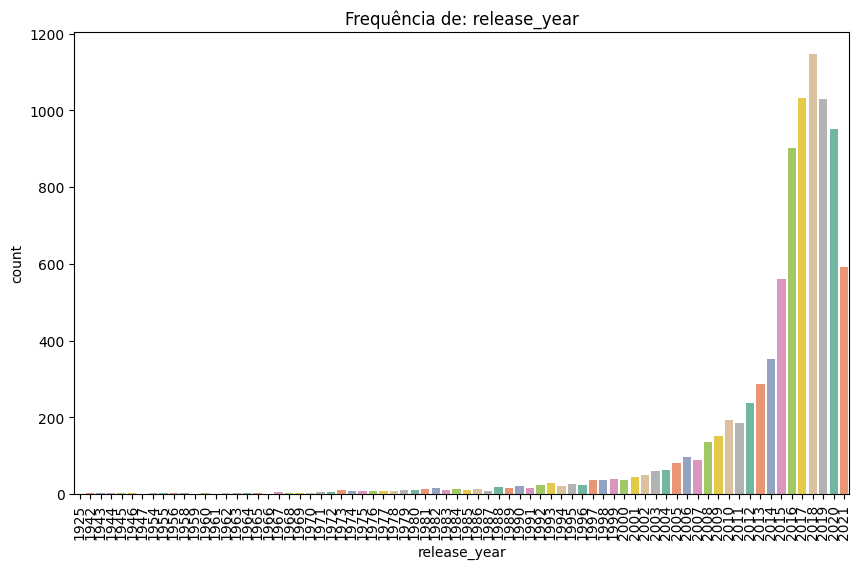

Frequência da coluna release_year:
    release_year  Frequência
0           2018        1147
1           2017        1032
2           2019        1030
3           2020         953
4           2016         902
..           ...         ...
69          1959           1
70          1925           1
71          1961           1
72          1947           1
73          1966           1

[74 rows x 2 columns]


In [11]:
# Usamos a lista preenchida para mostrar informações (gráficos e quantidades) das colunas numericas

for col in col_num:
    plt.figure(figsize=(10, 6))
    plt.title(f"Frequência de: {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequência")
    sns.countplot(data=df, x=col, palette="Set2")
    plt.xticks(rotation=90)
    plt.show()  # Exibe o gráfico
    # Conta a frequência dos valores na coluna
    qtd = df[col].value_counts().reset_index(name='Frequência')
    qtd.columns = [col, 'Frequência']
    # Imprime as frequências
    print(f'Frequência da coluna {col}:')
    print(qtd)